<img src="Title.jpg">

### ** Estatística Descritiva como parte da Análise Exploratória de Dados**

### **Preparações**

Nesta etapa, importa-se as bibliotecas necessárias e carrega-se os arquivos necessários para a análise exploratória dos dados.

In [8]:
import scipy as sp
import sklearn as skl
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
df = pd.read_csv('Detailed_Flights_4.txt')
df.head()

,destiny,arrival_expect_date,arrival_expect_hour,origin,depart_expect_date,depart_expect_hour,airline,flight,line_type,depart_expect,...,depart_humidity,depart_pressure,depart_visibility,depart_conditions,arrival_temperature,arrival_dew_point,arrival_humidity,arrival_pressure,arrival_visibility,arrival_conditions
0,KJFK,01/01/2009,18:00:00,SBGR,01/01/2009,08:00:00,TAM,8082,I,01/01/2009 08:45,...,83.0,1015.0,NaN,Clear,3.9,9.5,17.2,36.0,1025.4,NaN
1,KJFK,02/01/2009,08:00:00,SBGR,01/01/2009,22:00:00,TAM,8080,I,01/01/2009 22:30,...,94.0,1015.0,10.0,Partly Cloudy,1.7,4.9,8.3,48.0,1016.0,NaN
2,KJFK,02/01/2009,09:00:00,SBGL,01/01/2009,23:00:00,TAM,8078,I,01/01/2009 23:15,...,83.0,1011.0,NaN,Clear,2.2,3.5,8.9,44.0,1015.1,NaN
3,KJFK,02/01/2009,09:00:00,SAEZ,01/01/2009,22:00:00,AAL,956,I,01/01/2009 22:15,...,59.0,1020.0,NaN,Overcast,2.2,3.5,8.9,44.0,1015.1,NaN
4,KJFK,02/01/2009,09:00:00,SBGR,01/01/2009,23:00:00,AAL,950,I,01/01/2009 23:25,...,94.0,1015.0,NaN,Clear,2.2,3.5,8.9,44.0,1015.1,NaN


Visualizando-se de uma forma geral como está estruturado o data set, suas variáveis e tipos de dados.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82822 entries, 0 to 82821
Data columns (total 34 columns):
destiny                82822 non-null object
arrival_expect_date    82822 non-null object
arrival_expect_hour    82822 non-null object
origin                 82822 non-null object
depart_expect_date     82822 non-null object
depart_expect_hour     82822 non-null object
airline                82822 non-null object
flight                 82822 non-null int64
line_type              82820 non-null object
depart_expect          82822 non-null object
depart                 76090 non-null object
arrival_expect         82822 non-null object
arrival                76090 non-null object
status                 82822 non-null object
observation            22388 non-null object
departure_delay        76090 non-null float64
arrival_delay          76090 non-null float64
duration_expect        82822 non-null int64
duration               76090 non-null float64
duration_delta         76090 non-nu

#### 1. Aplicação de medidas de tendência central, dispersão e correlação entre as variáveis

**Medidas de Tendência Central**<BR><BR>
As medidas de tendência central definem valores significativos, representativos e adequados para um conjunto de dados, dependendo do que se deseja analisar. São elas a média, mediana, quartis e a moda.

**Média**<BR><BR>
A média é uma medida de tendência central que indica o valor onde estão concentrados os dados de um conjunto de valores, representando um valor significativo para o mesmo. Para o data set em questão, pode-se analisar a média dos atrasos (em minutos) nas partidas e chegadas dos voos.

In [6]:
df['departure_delay'].mean()

-151.98121960835851

In [14]:
df['arrival_delay'].mean()

28.86919351861056

Observando-se que o resultado da média dos atrasos (em minutos) nas partidas foi um número negativo, pressupõe-se que existem valores negativos para esta variável. Neste caso, pode-se remover esse tipo de inconsistência e calcular novamente a média.

In [8]:
df = df.query('~(departure_delay < 0)')

In [9]:
df['departure_delay'].mean()

21.63934845278839

Então, tem-se os seguintes resultados:<BR><BR>
1.1. Uma média de 21 minutos de atraso nas partidas e;<BR>
1.2. Uma média de 28 minutos de atraso nas chegadas

Segundo a resolução 400 da Agência Nacional de Aviação Civil (ANAC), seja qual for o motivo do atraso no voo, as companhias aéreas são obrigadas a prestar assistência aos passageiros, mesmo que elas não sejam as responsáveis diretas pelo atraso. Determina o artigo 27 desta resolução, o seguinte:<BR>

A partir de uma hora de atraso: comunicação (internet, telefone, entre outros)<BR>
A partir de duas horas de atraso: alimentação de acordo com o horário (voucher, refeição, lanche etc)<BR>
A partir de quatro horas de atraso: hospedagem (somente em caso de pernoite no aeroporto) e transporte de ida e volta. Se o passageiro estiver no local de seu domicílio, a empresa poderá oferecer apenas o transporte para sua residência e de sua casa para o aeroporto.
<BR>
Quando o voo atrasar mais de quatro horas ou for cancelado, a companhia aérea deverá oferecer alternativas de reacomodação em outro voo, devolver o valor da passagem ou levar o passageiro por outra modalidade de transporte.

Para o caso dos resultados encontrados, conclui-se que não incorrerá nos casos previstos da resolução 400 da ANAC.

**Moda**<BR>
A moda é o valor que mais se repete dentro de um conjunto. 

In [10]:
df['departure_delay'].mode()

0    0.0
dtype: float64

In [11]:
df['arrival_delay'].mode()

0    0.0
dtype: float64

Quanto as outras medidas, pode-se resumir por meio da função **describe()**.

In [12]:
df['departure_delay'].describe()

count    70417.000000
mean        21.639348
std        241.068862
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      43234.000000
Name: departure_delay, dtype: float64

In [13]:
df['arrival_delay'].describe()

count     70417.000000
mean         28.869194
std        1995.260727
min       -1411.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      525660.000000
Name: arrival_delay, dtype: float64

Observa-se que a contagem (count = 70417) é menor que o número total de observações (82.822), o que entende-se a existência de valores nulos ou NaN (Not a Number).

Tem-se também valores negativos para os atrasos nas chegadas e do mesmo modo que removemos essas inconsistências para os valores de atraso nas partidas, executa-se o mesmo procedimento.

In [15]:
df = df.query('~(arrival_delay < 0)')

In [17]:
df['departure_delay'].describe()

count    69584.000000
mean        21.651098
std        242.488013
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      43234.000000
Name: departure_delay, dtype: float64

In [18]:
df['arrival_delay'].describe()

count     69584.000000
mean         29.618317
std        2007.144232
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      525660.000000
Name: arrival_delay, dtype: float64

Com a remoção das inconsistências, a média dos atrasos nas chegadas ficou em 29 minutos.

**Medidas de Dispersão**<BR>
As medidas de dispersão são medidas que indicam o quão espalhados os dados estão, ou como eles variam. São elas a amplitude, a variância, o desvio padrão e o desvio absoluto.

**Amplitude**<BR>
A amplitude nada mais é do que a diferença entre o maior e o menor valor de um conjunto de dados.

In [21]:
max_depart_delay=df['departure_delay'].max()
min_depart_delay=df['departure_delay'].min()
print("Amplitude dos Atrasos nas Partidas = ", max_depart_delay-min_depart_delay)

Amplitude dos Atrasos nas Partidas =  43234.0


In [22]:
max_arrival_delay=df['arrival_delay'].max()
min_arrival_delay=df['arrival_delay'].min()
print("Amplitude dos Atrasos nas Chegadas = ", max_arrival_delay-min_arrival_delay)

Amplitude dos Atrasos nas Chegadas =  525660.0


**Variância**<BR>
A variância é uma medida que expressa quanto os dados de um conjunto estão afastados de seu valor esperado.

In [24]:
print("Variância dos Atrasos nas Partidas = ", df['departure_delay'].var())

Variância dos Atrasos nas Partidas =  58800.436275361135


In [25]:
print("Variância dos Atrasos nas Chegadas = ", df['arrival_delay'].var())

Variância dos Atrasos nas Chegadas =  4028627.968813716


**Desvio Padrão**
O desvio padrão também é uma medida de dispersão, que indica quanto os dados estão afastados da média. Um valor de desvio padrão alto indica que os valores estão mais espalhados, mais longe da média, e um desvio padrão baixo indica que os valores estão mais próximos da média.
Nos valores dos atrasos nas Partidas está em 242 minutos e nas Chegadas em 2007 minutos, conforme resultado da função **describe()** acima executado.

**Desvio absoluto**<BR>
O Desvio Absoluto é calculado da seguinte forma: primeiro, encontramos a média dos valores; depois, calculamos a distância de cada ponto desta média; somamos as distâncias e dividimos o resultado pela média destas distâncias.

In [27]:
print("Desvio Absoluto nas Partidas = ",df['departure_delay'].mad())

Desvio Absoluto nas Partidas =  37.56981103048167


In [28]:
print("Desvio Absoluto nas Chegadas = ",df['arrival_delay'].mad())

Desvio Absoluto nas Chegadas =  51.524281574467075


**Covariância e Correlação**<BR>
Em alguns momentos, necessita-se saber se duas variáveis possuem alguma relação entre si dentro de um conjunto de dados. Para estes casos, calculamos a covariância e a correlação.

A covariância é uma medida numérica que indica a inter-dependência entre duas variáveis. A covariância indica como duas variáveis se comportam conjuntamente em relação às suas médias. Uma covariância igual a 0 indica que as duas variáveis são totalmente independentes, enquanto que uma covariância alta e positiva indica que uma variável é grande quando a outra é grande. Analogamente, uma covariância negativa e com valor absoluto alto indica que uma variável é pequena quando a outra é grande.

In [11]:
print(df.cov())

                           flight  departure_delay  arrival_delay  \
flight               1.126109e+07     3.226604e+05  -2.709458e+04   
departure_delay      3.226604e+05     8.383470e+07   1.072974e+05   
arrival_delay       -2.709458e+04     1.072974e+05   3.729279e+06   
duration_expect     -1.857048e+04     5.624533e+03  -3.585801e+02   
duration            -3.415824e+05    -8.372178e+07   3.621623e+06   
duration_delta      -3.497549e+05    -8.372741e+07   3.621982e+06   
destiny.state                 NaN              NaN            NaN   
depart_temperature   1.637077e+03    -1.377708e+02  -3.223652e+01   
depart_dew_point     1.792615e+03     1.262665e+01  -1.035304e+01   
depart_humidity      2.088075e+03     7.814233e+02   7.581750e+01   
depart_pressure      1.034338e+04     2.724530e+02  -3.704293e+01   
depart_visibility   -1.710019e+04    -7.953273e+02   8.820489e+01   
arrival_temperature  1.581036e+03     2.388340e+03  -8.057843e+00   
arrival_dew_point    9.385468e+02 

A covariância, entretanto, pode ser difícil de ser compreendida e comparada, pois ela nos dá valores em escalas que serão diferentes conforme as variáveis mudem. Para uma melhor comparação, normalizamos a covariância para ter um valor que sempre estará entre 1 e -1, que é a correlação. Logo, a correlação também é outra medida que indica o quanto duas variáveis estão relacionadas. Seu valor fica sempre entre -1, que indica uma anti-correlação perfeita, e 1, que indica uma correlação perfeita.

In [12]:
print(df.corr())

                       flight  departure_delay  arrival_delay  \
flight               1.000000         0.010642      -0.004237   
departure_delay      0.010642         1.000000       0.006068   
arrival_delay       -0.004237         0.006068       1.000000   
duration_expect     -0.019707         0.002227      -0.000673   
duration            -0.011033        -0.977996       0.200586   
duration_delta      -0.011301        -0.978421       0.200680   
destiny.state             NaN              NaN            NaN   
depart_temperature   0.095421        -0.003020      -0.003350   
depart_dew_point     0.117052         0.000311      -0.001210   
depart_humidity      0.037906         0.005237       0.002409   
depart_pressure      0.034641         0.000351      -0.000227   
depart_visibility   -0.047054        -0.001149       0.002365   
arrival_temperature  0.063153         0.034551      -0.000553   
arrival_dew_point    0.042070         0.030115      -0.001235   
arrival_humidity    -0.06

Nos resultados acima de correlação, vislumbra-se registrar a correlação (porém, não a causalidade) entre as variáveis:<BR><BR>
duration_delta e arrival_delay = 0,99<BR>
duration e arrival_delay = 0,98<BR>
arrival_dew_point e arrival_temperature = 0,87<BR>
arrival_pressure e arrival_humidity = 0,87<BR><BR>
sendo as outras correlações abaixo de 0,76.

A realização da estatítica descritiva permite um melhor entendimento dos dados e análise das correlações entre os atributos.<br><br>
Com a utilização dos recursos gráficos para visualização dessas e outras medidas que se fizerem relevantes para o estudo e construindo-se uma matriz de correlação por meio do coeficiente de Pearson para todos os atributos do dataset dos voos domésticos, verifica-se que com exceção do relaciomento entre as variáveis acima já mencionadas, não identifica-se nenhuma outra correlação forte (próximo ou igual a 1). Portanto, padrões de atrasos seriam dificilmente descobertos por meio de uma análise de estatística descritiva.<br><br>
Neste contexto, vislumbra-se a necessidade de revelar padrões escondidos nos dados e a utilização de processos de mineração de dados, tais como: regras de associação.

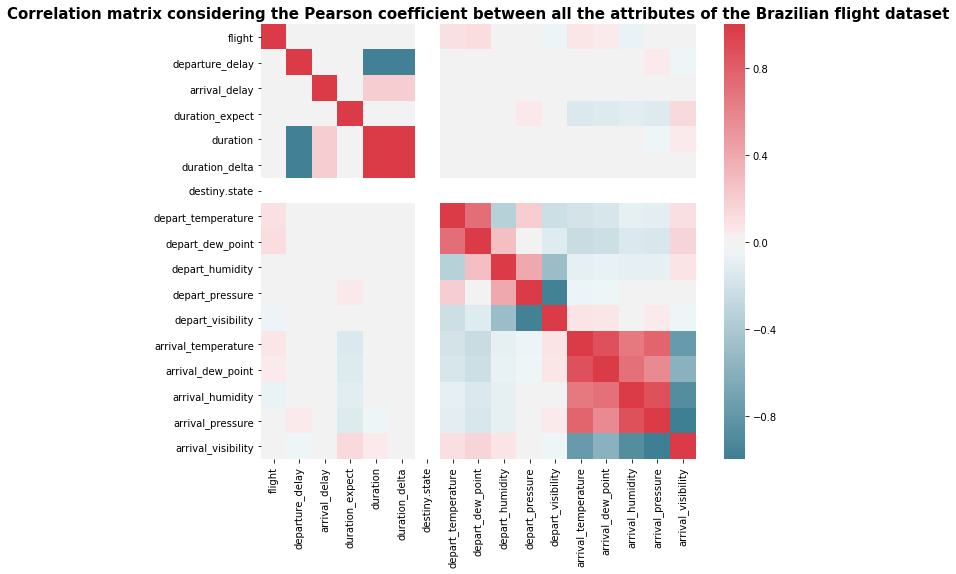

In [13]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
ax.set_title("Correlation matrix considering the Pearson coefficient between all the attributes of the Brazilian flight dataset", fontweight="bold", size=15)
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

Ainda no contexto da utilização dos recursos gráficos, pode-se obter o seguinte:<BR>
A) uma rápida contabilização dos voos atrasados por ano e;

B) plotagem de dois gráficos: visulização ao longo do tempo e percentual dos atrasos por ano.

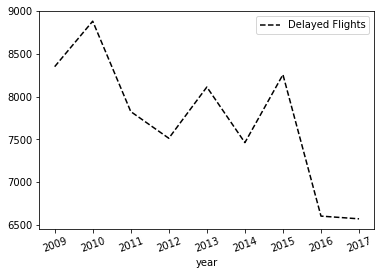

In [34]:
df["arrival_expect_date"] = pd.to_datetime(df["arrival_expect_date"], format="%d/%m/%Y")
df["arrival_expect_hour"] = pd.to_datetime(df["arrival_expect_hour"], format="%H:%M:%S")

df["depart_expect_date"] = pd.to_datetime(df["depart_expect_date"], format="%d/%m/%Y")
df["depart_expect_hour"] = pd.to_datetime(df["depart_expect_hour"], format="%H:%M:%S")

df["depart_expect"] = pd.to_datetime(df["depart_expect"], format="%d/%m/%Y %H:%M")
df["depart"] = pd.to_datetime(df["depart"], format="%d/%m/%Y %H:%M")

df["arrival_expect"] = pd.to_datetime(df["arrival_expect"], format="%d/%m/%Y %H:%M")
df["arrival"] = pd.to_datetime(df["arrival"], format="%d/%m/%Y %H:%M")

df['year'] = df['depart'].dt.year # Adiciona coluna ano
grouped = df.groupby(['year'], as_index=False).flight.count() # Contabiliza total de voos atrasados agrupado por ano
grouped.plot(style='k--', label='Delayed Flights', x='year',y='flight', rot=20)

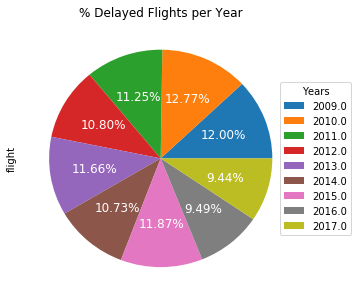

In [35]:
grouped.plot.pie(x='year',y='flight', autopct='%.2f%%', fontsize=12, figsize=(5, 5), title='% Delayed Flights per Year', textprops=dict(color="w"))
plt.legend(grouped['year'], title="Years", loc="right", bbox_to_anchor=(1, 0, 0.2, 1))

Verifica-se pelos gráficos acima em relação aos atrasos dos voos:<br><br>
    
A) aumento de 2009 até 2010; <br><br>
B) declínio acentuado de 2010 até 2012; <br><br>
C) oscilação entre os anos de 2012 até 2015; e<br><br>
D) outro declínio acentuado de 2015 até 2017;

Com as análises acima realizadas, permite-se executar:<BR><BR>
Transformação de valores por meio do uso da média ou desvio-padrão;<BR>
Seleção de dados e atributos por meio do uso de medidas de correlação;

#### 2. Análise de Frequência

Considerando-se apenas os voos domésticos, pode-se verificar a frequência das partidas dos principais aeroportos (cuja representatividade é de algo em torno de 80% do total dos voos).

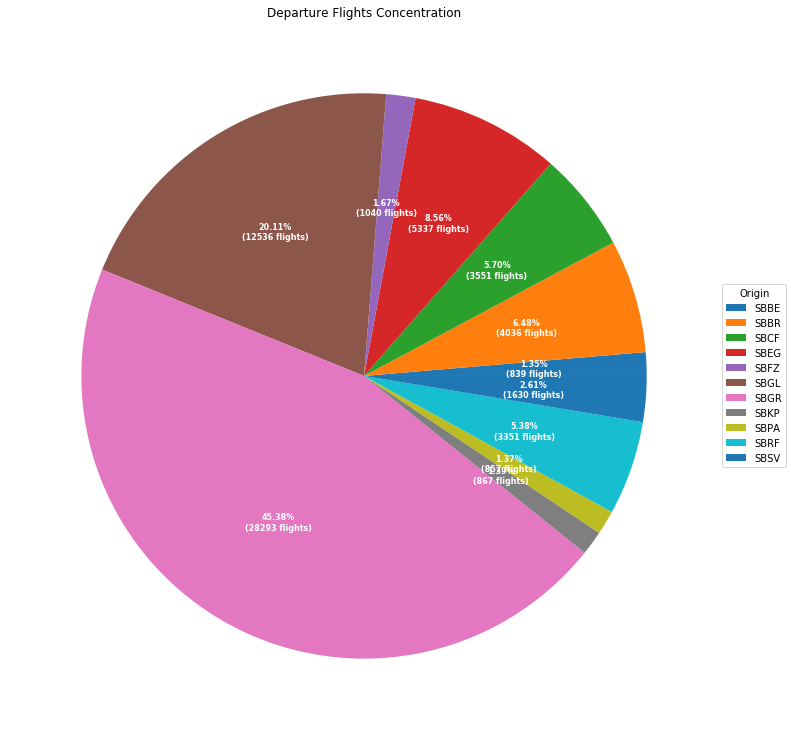

In [6]:
# Group by variable ORIGIN and count the number of destiny
grouped = df.groupby(['origin'], as_index=False).destiny.count()

df_origin = pd.DataFrame(grouped)

# Define a list of international (INTL) airports-origin to be dropped
intl_origins = ['KJFK','MPTO','SAEZ','SCEL','SKBO','SPJC','SUMU']

# Create a new dataframe dropping the international airports
df_origin_new = df_origin[~df_origin.isin(intl_origins)].dropna()

fig, ax = plt.subplots(figsize=(13, 13), subplot_kw=dict(aspect="equal"))

data = df_origin_new['destiny']
origins = df_origin_new['origin']

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.2f}%\n({:d} flights)".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, origins,
          title="Origin",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Departure Flights Concentration")

plt.show()

**Remoção de outliers**.<br><br>

Cerca de 68% dos valores de uma distribuição normal estão a um σ (desvio-padrão) da média; cerca de 95% estão a dois sigmas; e 99.7% estão a 3 sigmas.<br><br>


<img src="outliers.png">

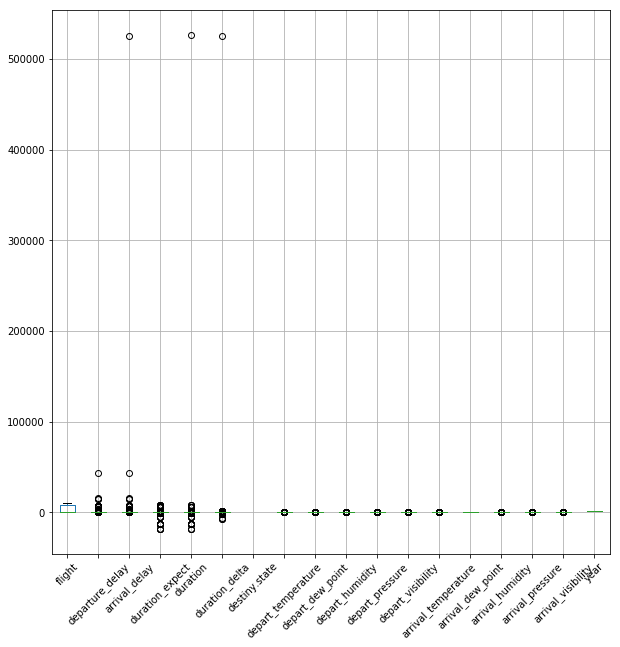

In [39]:
# Procurando por outliers por meio do gráfico boxplot
#
plt.subplots(figsize=(10, 10))
df.boxplot(rot=45)

Analisando-se o gráfico acima, pode-se observar que as variáveis **departure_delay**, **arrival_delay**, **duration_expect**, **duration** e **duration_delta** possuem outliers.<br><br>
As demais não possuem outliers.

In [40]:
#------------------------------------------------------------------------------
# accept a dataframe, remove outliers, return cleaned data in a new dataframe
# see http://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm
#------------------------------------------------------------------------------
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [42]:
remove_outlier(df, 'departure_delay')

,destiny,arrival_expect_date,arrival_expect_hour,origin,depart_expect_date,depart_expect_hour,airline,flight,line_type,depart_expect,...,depart_pressure,depart_visibility,depart_conditions,arrival_temperature,arrival_dew_point,arrival_humidity,arrival_pressure,arrival_visibility,arrival_conditions,year


In [43]:
remove_outlier(df, 'arrival_delay')

,destiny,arrival_expect_date,arrival_expect_hour,origin,depart_expect_date,depart_expect_hour,airline,flight,line_type,depart_expect,...,depart_pressure,depart_visibility,depart_conditions,arrival_temperature,arrival_dew_point,arrival_humidity,arrival_pressure,arrival_visibility,arrival_conditions,year


In [44]:
remove_outlier(df, 'duration_expect')

,destiny,arrival_expect_date,arrival_expect_hour,origin,depart_expect_date,depart_expect_hour,airline,flight,line_type,depart_expect,...,depart_pressure,depart_visibility,depart_conditions,arrival_temperature,arrival_dew_point,arrival_humidity,arrival_pressure,arrival_visibility,arrival_conditions,year
0,KJFK,2009-01-01,1900-01-01 18:00:00,SBGR,2009-01-01,1900-01-01 08:00:00,TAM,8082,I,2009-01-01 08:45:00,...,1015.0,NaN,Clear,3.9,9.5,17.2,36.0,1025.4,NaN,2009.0
1,KJFK,2009-01-02,1900-01-01 08:00:00,SBGR,2009-01-01,1900-01-01 22:00:00,TAM,8080,I,2009-01-01 22:30:00,...,1015.0,10.0,Partly Cloudy,1.7,4.9,8.3,48.0,1016.0,NaN,2009.0
2,KJFK,2009-01-02,1900-01-01 09:00:00,SBGL,2009-01-01,1900-01-01 23:00:00,TAM,8078,I,2009-01-01 23:15:00,...,1011.0,NaN,Clear,2.2,3.5,8.9,44.0,1015.1,NaN,2009.0
3,KJFK,2009-01-02,1900-01-01 09:00:00,SAEZ,2009-01-01,1900-01-01 22:00:00,AAL,956,I,2009-01-01 22:15:00,...,1020.0,NaN,Overcast,2.2,3.5,8.9,44.0,1015.1,NaN,2009.0
4,KJFK,2009-01-02,1900-01-01 09:00:00,SBGR,2009-01-01,1900-01-01 23:00:00,AAL,950,I,2009-01-01 23:25:00,...,1015.0,NaN,Clear,2.2,3.5,8.9,44.0,1015.1,NaN,2009.0
6,KJFK,2009-01-02,1900-01-01 09:00:00,SBGR,2009-01-01,1900-01-01 23:00:00,DAL,120,I,2009-01-01 23:40:00,...,1015.0,NaN,Clear,2.2,3.5,8.9,44.0,1015.1,NaN,2009.0
7,KJFK,2009-01-02,1900-01-01 09:00:00,SBGR,2009-01-01,1900-01-01 23:00:00,JAL,47,I,2009-01-01 23:55:00,...,1015.0,NaN,Clear,2.2,3.5,8.9,44.0,1015.1,NaN,2009.0
8,KJFK,2009-01-02,1900-01-01 18:00:00,SBGR,2009-01-02,1900-01-01 08:00:00,TAM,8082,I,2009-01-02 08:45:00,...,1014.0,8.0,Light Rain,0.6,4.3,3.9,79.0,1008.5,NaN,2009.0
9,KJFK,2009-01-03,1900-01-01 08:00:00,SBGR,2009-01-02,1900-01-01 22:00:00,TAM,8080,I,2009-01-02 22:30:00,...,1011.0,10.0,Scattered Clouds,1.1,3.9,10.0,44.0,1015.7,NaN,2009.0
10,KJFK,2009-01-03,1900-01-01 09:00:00,SBGR,2009-01-02,1900-01-01 23:00:00,JAL,47,I,2009-01-02 23:55:00,...,1011.0,10.0,Mostly Cloudy,2.2,2.7,9.4,43.0,1015.7,NaN,2009.0


In [45]:
remove_outlier(df, 'duration')

,destiny,arrival_expect_date,arrival_expect_hour,origin,depart_expect_date,depart_expect_hour,airline,flight,line_type,depart_expect,...,depart_pressure,depart_visibility,depart_conditions,arrival_temperature,arrival_dew_point,arrival_humidity,arrival_pressure,arrival_visibility,arrival_conditions,year
0,KJFK,2009-01-01,1900-01-01 18:00:00,SBGR,2009-01-01,1900-01-01 08:00:00,TAM,8082,I,2009-01-01 08:45:00,...,1015.0,NaN,Clear,3.9,9.5,17.2,36.0,1025.4,NaN,2009.0
1,KJFK,2009-01-02,1900-01-01 08:00:00,SBGR,2009-01-01,1900-01-01 22:00:00,TAM,8080,I,2009-01-01 22:30:00,...,1015.0,10.0,Partly Cloudy,1.7,4.9,8.3,48.0,1016.0,NaN,2009.0
2,KJFK,2009-01-02,1900-01-01 09:00:00,SBGL,2009-01-01,1900-01-01 23:00:00,TAM,8078,I,2009-01-01 23:15:00,...,1011.0,NaN,Clear,2.2,3.5,8.9,44.0,1015.1,NaN,2009.0
3,KJFK,2009-01-02,1900-01-01 09:00:00,SAEZ,2009-01-01,1900-01-01 22:00:00,AAL,956,I,2009-01-01 22:15:00,...,1020.0,NaN,Overcast,2.2,3.5,8.9,44.0,1015.1,NaN,2009.0
4,KJFK,2009-01-02,1900-01-01 09:00:00,SBGR,2009-01-01,1900-01-01 23:00:00,AAL,950,I,2009-01-01 23:25:00,...,1015.0,NaN,Clear,2.2,3.5,8.9,44.0,1015.1,NaN,2009.0
6,KJFK,2009-01-02,1900-01-01 09:00:00,SBGR,2009-01-01,1900-01-01 23:00:00,DAL,120,I,2009-01-01 23:40:00,...,1015.0,NaN,Clear,2.2,3.5,8.9,44.0,1015.1,NaN,2009.0
7,KJFK,2009-01-02,1900-01-01 09:00:00,SBGR,2009-01-01,1900-01-01 23:00:00,JAL,47,I,2009-01-01 23:55:00,...,1015.0,NaN,Clear,2.2,3.5,8.9,44.0,1015.1,NaN,2009.0
8,KJFK,2009-01-02,1900-01-01 18:00:00,SBGR,2009-01-02,1900-01-01 08:00:00,TAM,8082,I,2009-01-02 08:45:00,...,1014.0,8.0,Light Rain,0.6,4.3,3.9,79.0,1008.5,NaN,2009.0
9,KJFK,2009-01-03,1900-01-01 08:00:00,SBGR,2009-01-02,1900-01-01 22:00:00,TAM,8080,I,2009-01-02 22:30:00,...,1011.0,10.0,Scattered Clouds,1.1,3.9,10.0,44.0,1015.7,NaN,2009.0
10,KJFK,2009-01-03,1900-01-01 09:00:00,SBGR,2009-01-02,1900-01-01 23:00:00,JAL,47,I,2009-01-02 23:55:00,...,1011.0,10.0,Mostly Cloudy,2.2,2.7,9.4,43.0,1015.7,NaN,2009.0


In [46]:
remove_outlier(df, 'duration_delta')

,destiny,arrival_expect_date,arrival_expect_hour,origin,depart_expect_date,depart_expect_hour,airline,flight,line_type,depart_expect,...,depart_pressure,depart_visibility,depart_conditions,arrival_temperature,arrival_dew_point,arrival_humidity,arrival_pressure,arrival_visibility,arrival_conditions,year


#### 3. Identificação de valores numéricos e categóricos

Dados categóricos são aqueles classificados de acordo com alguma categoria. Por exemplo, sexo: pode ser masculino ou feminino.<BR>
A categoria dos dados podem ser: nominais ou ordinais. Nominais quando ocorre o exemplo mencionado e ordinais, quando ocorrem situações do tipo: escolaridade: 1o, 2o ou 3o grau.

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76316 entries, 0 to 82821
Data columns (total 35 columns):
destiny                76316 non-null object
arrival_expect_date    76316 non-null datetime64[ns]
arrival_expect_hour    76316 non-null datetime64[ns]
origin                 76316 non-null object
depart_expect_date     76316 non-null datetime64[ns]
depart_expect_hour     76316 non-null datetime64[ns]
airline                76316 non-null object
flight                 76316 non-null int64
line_type              76314 non-null object
depart_expect          76316 non-null datetime64[ns]
depart                 69584 non-null datetime64[ns]
arrival_expect         76316 non-null datetime64[ns]
arrival                69584 non-null datetime64[ns]
status                 76316 non-null object
observation            16289 non-null object
departure_delay        69584 non-null float64
arrival_delay          69584 non-null float64
duration_expect        76316 non-null int64
duration         

Observando-se acima, temos as variáveis numéricas: **flight**, **duration_expect**, **departure_delay**, **arrival_delay**, **duration**, **duration_delta**, **destiny.state**, **depart_temperature**, **depart_dew_point**, **depart_humidity**, **depart_pressure**, **depart_visibility**, **arrival_temperature**, **arrival_dew_point**, **arrival_humidity**, **arrival_pressure**, **arrival_visibility** e **year**

Essas observações são importantes, pois ao aplicar-se algoritmos de machine learning e/ou data mining, pode-se ser necessário converter as variáveis numéricas em categóricas ou vice-versa.

#### 4. Análise, comparação de resultados e conclusão.

Uma vez tendo-se eliminado os outliers, pode-se verificar novamente a concentração dos voos e possíveis atrasos e propagações, por meio de um **mapa de calor**.

In [ ]:
# Biblioteca de Mapas
import folium
# Cria um dataframe com as latitudes dos aeroportos (fonte: ANAC)
lat = pd.DataFrame({'lat': [0,0,0,-1.4,-15.87,-19.62,-3.03,-3.77,-22.8,-23.44,-23,-29.99,-8.12,-12.91]})
# Cria um dataframe com as longitudes dos aeroportos (fonte: ANAC)
long = pd.DataFrame({'long': [0,0,0,-48.45,-47.92,-43.97,-60.04,-38.52,-43.25,-46.47,-47.13,-51.17,-34.92,-38.33]})
# Junta os dataframes
dat1 = df_origin_new
dat2 = dat1.join(lat)
dat3 = dat2.join(long)
from folium import plugins
coordenadas = []
lat = dat3['lat'][:11].values
long = dat3['long'][:11].values

mapa = folium.Map(location=[-15.788497,-47.879873],tiles='Stamen Toner',zoom_start=3,width=450,height=330)

for la,lo in zip(lat,long):
    coordenadas.append([la,lo])

mapa.add_child(plugins.HeatMap(coordenadas))
mapa                      

<img src="Flight_Delay_Heat_Map.jpg">

Observa-se acima, que a região sudeste é a que mais concentra partidas com maior probabilidade de atrasos e propagações de atrasos para outras regiões do país.

Conclui-se que os atrasos dos voos domésticos estão dentro dos padrões esperados pela ANAC, seja por razões climatológicas estáveis do nosso país ou por melhorias operacionais no setor. Uma análise mais detalhada pode ser realizada por meio da utilização de regras de associação, podendo-se descobrir padrõres escondidos nos dados ou até mesmo a relevância de outros fatores associados aos atrasos e que até o momento são desconhecidos. Não obstante, a aplicação de algoritmos de predição para os atrasos podem-se tornar ferramentas importantes não somente pelo fato da constatação do atraso em si, mas pela comunicação prévia aos usuários do transporte aéreo e remanejos de operações que sejam úteis a mitigação da propagação desses atrasos.